In [100]:
import numpy as np
import matplotlib.pyplot as p
import h5py

In [2]:
p.rc('figure',figsize=(8,6))
p.rc('font',size=18)
p.rc('figure.constrained_layout',use=True)
p.rc('xtick.major',size=8,width=2)
p.rc('xtick.minor',visible=True,size=4,width=1)
p.rc('ytick.major',size=8,width=2)
p.rc('ytick.minor',visible=True,size=4,width=1)

In [3]:
def get_ts(run_files,datadir='./'):
    nrun = run_files.size
    meanA = np.zeros(nrun)
    meanE = np.zeros(nrun)
    ts = np.empty(nrun,dtype=object)
    for ifile in range(nrun):
        ts[ifile] = np.loadtxt(datadir+run_files[ifile],comments='%')
        nt = np.shape(ts[ifile])[0]
        tmin = int(9.*nt/10.)
        tmax = nt-1
        meanA[ifile] = np.mean(ts[ifile][tmin:tmax,1])
        meanE[ifile] = np.mean(ts[ifile][tmin:tmax,8])
    return ts,meanA,meanE

In [24]:
def penergy(ts):
    fig = p.figure()
    ax = fig.add_subplot(111)
    nruns = np.shape(ts)[0]
    for ip in range(nruns):
        ax.plot(ts[ip][:,0],ts[ip][:,8],label='run'+str(ip))
    ax.legend()
#ax.set_xlim([0.5,300])
    ax.set_xlabel('No. of MC steps')
    ax.set_ylabel(r'$E/k_{\rm B}T$')

In [89]:
def pA(ts):
    fig = p.figure()
    ax = fig.add_subplot(111)
    nruns = np.shape(ts)[0]
    meanA = np.zeros(nruns)
    for ip in range(nruns):
        ax.plot(ts[ip][:,0],ts[ip][:,1],label='run'+str(ip),color='C'+str(ip))
        nt = np.shape(ts[ip])[0]
        tmin = int(6.*nt/10.)
        tmax = nt-1
        meanA[ip] = np.mean(ts[ip][tmin:tmax,1])
        tt = np.linspace(ts[ip][tmin,0],ts[ip][tmax,0],3)
        avgA = meanA[ip]+np.zeros(3)
        oneA = 1.+np.zeros(3)
        taxis = np.linspace(ts[ip][0,0],ts[ip][-1,0],3)
        ax.plot(tt,avgA,'k-')
        ax.plot(taxis,oneA,'g')
    ax.legend()
#ax.set_xlim([0.5,300])
    ax.set_xlabel('No. of MC steps')
    ax.set_ylabel(r'${\rm Area}/N^2$')
    print(meanA)
    return

In [150]:
def pdfA(tsA,nbins=64,quant='Area'):
    nt = np.shape(tsA)[0]
    tmin = int(6.*nt/10.)
    tmax = nt-1
    meanA = np.mean(tsA[tmin:tmax])
    pdf,edges = np.histogram(tsA[tmin:tmax]-meanA,bins=nbins,density=True)
    fig = p.figure()
    ax = fig.add_subplot(111)
    ax.plot(edges[1:],pdf,'.-')
    std = np.std(tsA[tmin:tmax])
    pfit = (1/(std*np.sqrt(2*np.pi) )*np.exp(-(edges[1:]**2.)/(2.*std**2)))
    ax.plot(edges[1:], pfit,'k')
    ax.grid(True)
#ax.set_xlim([0.5,300])
    ax.set_xlabel(quant)
    ax.set_ylabel('PDF')
    print(meanA,std)
    return pdf,edges,meanA

In [141]:
def pdfh(fname,datadir='tau_0o1_2/',nbins=64):
    f = h5py.File(datadir+fname, 'r')
    hh = f.get('RectMesh')
    fig = p.figure()
    ax1 = fig.add_subplot(2,1,1)
    #ax1 = fig.gca(projection='3d')
    X = np.arange(0, hh.shape[0])
    Y = np.arange(0, hh.shape[1])
    X, Y = np.meshgrid(X, Y)
    #surf = ax1.plot_surface(X, Y, hh, cmap='viridis', linewidth=0, antialiased=False)
    ax1.contourf(X,Y,hh)
    p.xlabel("x")
    p.ylabel("y")
    ax1.set_aspect("equal")
    #ax1.set_zlim(-4, 4)
    meanh = np.mean(hh)
    pdf,edges = np.histogram(hh-meanh,bins=nbins,density=True)
    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(edges[1:],pdf,'o')
    std = np.std(hh)
    pfit = (1/(std*np.sqrt(2*np.pi) )*np.exp(-(edges[1:]**2.)/(2.*std**2)))
    ax2.plot(edges[1:], pfit,'k')
    ax2.grid(True)
#ax.set_xlim([0.5,300])
    ax2.set_xlabel(r'$h$')
    ax2.set_ylabel('PDF')
    return meanh,np.std(hh)

In [153]:
run_files=np.array(['sampling0.txt', 'sampling1.txt', 'sampling2.txt', 'sampling3.txt'])
ts,meanA, meanE = get_ts(run_files,datadir='tau_0o1_3/')

In [154]:
print(meanA,meanE)

[1.04170347 1.02512715 0.98453964 0.91395528] [0.50704187 0.52081746 0.51979529 0.51917042]


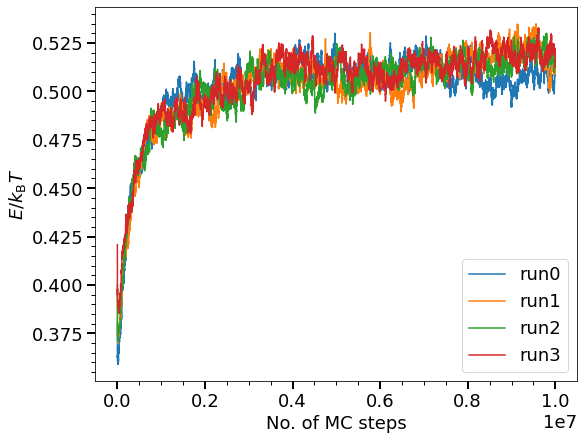

In [155]:
penergy(ts)

[1.04579256 1.01375035 0.9754032  0.90854085]


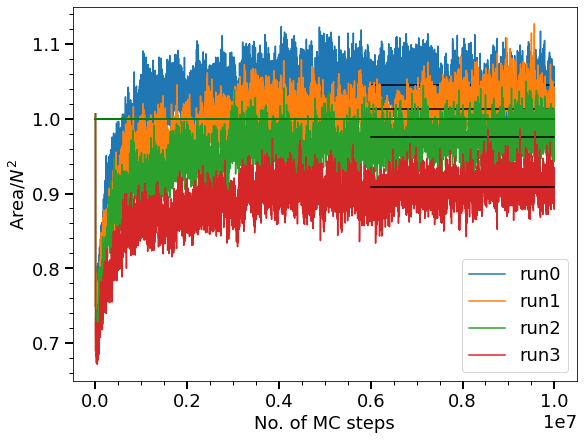

In [156]:
pA(ts)

0.9754031996456082 0.020565109601807373


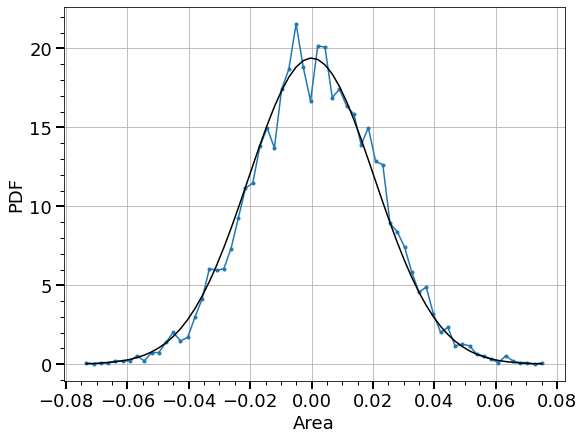

In [157]:
pdf,edges,meanA=pdfA(ts[2][:,1],nbins=64)

0.5144615567711263 0.005756709755945442


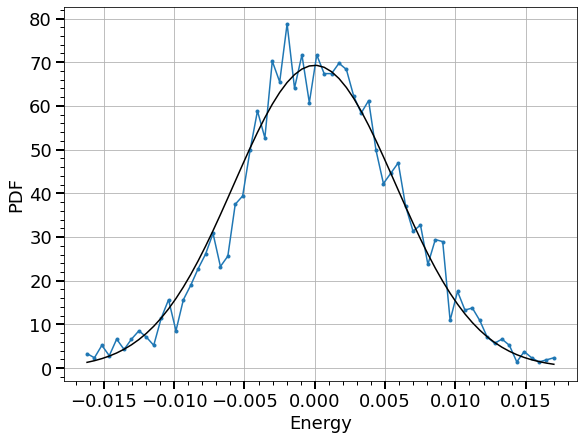

In [158]:
pdf,edges,meanA=pdfA(ts[2][:,8],nbins=64,quant='Energy')

(-0.005493751618764103, 0.28666990601777054)

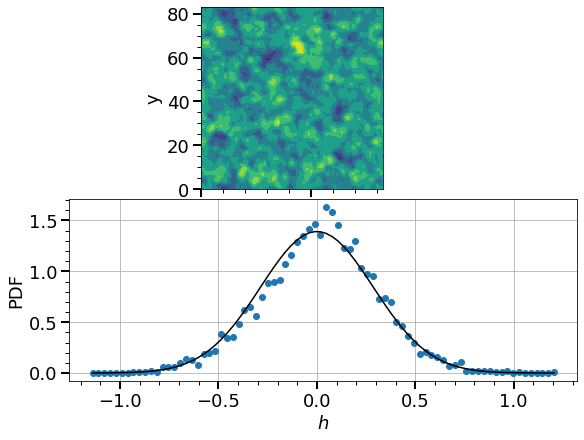

In [159]:
pdfh('hfield2.h5',nbins=80)